<a href="https://colab.research.google.com/github/its-rahul-cloud/MachineLearning/blob/main/Drowiness_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/


In [5]:
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
! kaggle datasets download "prasadvpatil/mrl-dataset"

 40% 9.00M/22.6M [00:00<00:00, 93.4MB/s]
100% 22.6M/22.6M [00:00<00:00, 155MB/s] 


In [7]:
!unzip mrl-dataset.zip

Archive:  mrl-dataset.zip
  inflating: train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00002_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00003_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00004_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00005_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00006_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00007_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00008_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00009_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00011_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00013_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00014_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00015_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00016_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00017_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00018_0

# Importing important library
imutils for image manipulation
pandas for image loading
cv2 foe image manipulation
and other for video format data but i am not going to go video fromat data
but what wee are going to do here is taking images from dataset and labeling them as Drowiness or not


In [23]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imutils



In [34]:
img_array = cv2.imread('../input/mrl-dataset/train/Closed_Eyes/fs.png', cv2.IMREAD_GRAYSCALE)

In [39]:
import os

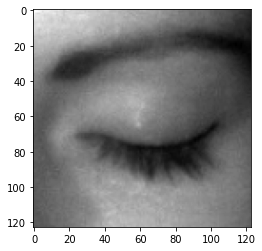

In [42]:
Datadirectory = 'train'
Classes = ['Closed_Eyes', 'Open_Eyes']
# Datadirectory = 'dataset_new/train/'
# Classes = ['Closed', 'Open']
for category in Classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

# Eye ration 
it is the eculidean distance of to point in eye 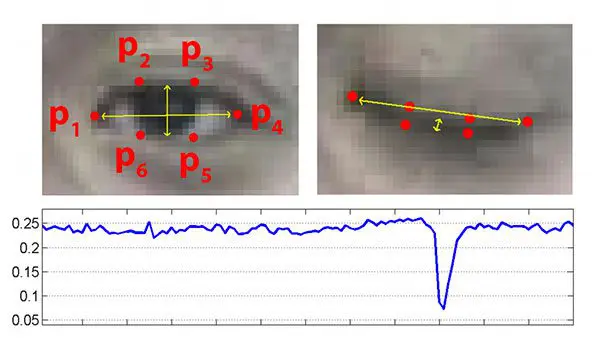

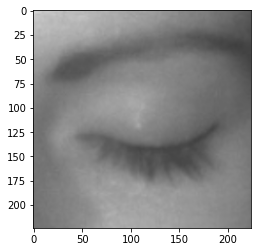

In [43]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [44]:
training_data = []

def create_training_data():
  for category in Classes:
      path = os.path.join(Datadirectory, category)
      class_num = Classes.index(category)
      for img in os.listdir(path):
        try :
           img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
           backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
           new_array = cv2.resize(backtorgb, (img_size,img_size))
           training_data.append([new_array, class_num])
        except Exception as e:
          pass
   


In [45]:
create_training_data()

In [46]:
print(len(training_data))

4000


In [47]:
import random
random.shuffle(training_data)

In [51]:
  X=[]
  Y=[]
  for feature,lable in training_data:
    X.append(feature)
    Y.append(lable)
  X=np.array(X).reshape(-1,img_size,img_size,3)

In [50]:
X.shape

(4000, 224, 224, 3)

In [53]:
X=X/255

In [54]:
Y=np.array(Y)

In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#Download Mobilenet 
using mobilnet pre trained model of tensorflow


In [56]:
model=tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 0s 0us/step


In [58]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

# Test if eye is close or not
using mobilenet model
The model will predict 1 for open eye and 0 for close eye

In [79]:
img_array = cv2.imread('/content/train/Closed_Eyes/s0001_00004_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [80]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [81]:
X_input.shape

(1, 224, 224, 3)

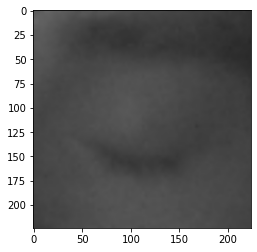

In [82]:
plt.imshow(new_array)

In [84]:
X_input = X_input/255.0
prediction = model.predict(X_input)


In [85]:
prediction

array([[2.70077202e-04, 5.91738557e-04, 9.91981069e-05, 1.07198859e-04,
        1.18702697e-03, 2.64901784e-04, 1.05579023e-03, 2.17812412e-05,
        7.15239657e-05, 8.87425413e-05, 5.60456247e-04, 1.44262012e-04,
        2.48789671e-04, 3.51998227e-04, 3.95337294e-04, 1.42511504e-03,
        4.11991175e-04, 6.05506684e-05, 4.96442488e-04, 9.75383955e-05,
        6.97804790e-04, 4.74695908e-03, 1.80887221e-03, 8.13569757e-04,
        6.81697682e-04, 2.00034658e-04, 9.96084767e-04, 5.92446071e-04,
        1.92741933e-03, 1.67528982e-04, 1.17262323e-04, 4.05094732e-04,
        5.05689706e-04, 1.84910794e-04, 1.34226563e-03, 4.68390608e-05,
        1.10163113e-04, 8.85987902e-05, 4.71051259e-04, 1.21810437e-04,
        2.53779872e-04, 6.42452273e-04, 8.19137131e-05, 2.14715081e-04,
        2.83256784e-04, 8.23786759e-05, 5.20549947e-04, 7.86453747e-05,
        4.89567610e-05, 4.08685446e-04, 1.24409026e-03, 9.31346949e-05,
        8.63056979e-04, 1.72417518e-03, 1.63456181e-03, 3.856888

#Creating new model
this model creating of large number of prediction which closs to zero but we want a model that predict on only one value

In [86]:
base_input = model.layers[0].input

In [87]:
base_output = model.layers[-4].output

In [88]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [89]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [91]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [96]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [97]:
new_model.fit(X,Y, epochs = 2, validation_split = 0.1)

Epoch 1/2
113/113 [==============================] - 578s 5s/step - loss: 0.0261 - accuracy: 0.9922 - val_loss: 0.0487 - val_accuracy: 0.9875
Epoch 2/2
113/113 [==============================] - 565s 5s/step - loss: 0.0137 - accuracy: 0.9978 - val_loss: 0.0575 - val_accuracy: 0.9850


In [98]:
new_model.save('binlos.h5')

In [100]:
new_model = tf.keras.models.load_model('binlos.h5')

In [111]:
img = cv2.imread('/content/train/Open_Eyes/s0001_02336_0_0_1_0_0_01.png')
new=cv2.resize(img,(img_size,img_size))
X=np.array(new).reshape(-1,img_size,img_size,3)
X=X/255

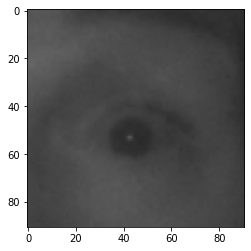

In [112]:
plt.imshow(img)

In [113]:
X.shape


(1, 224, 224, 3)

In [114]:
new_model.predict(X)

array([[1.]], dtype=float32)

Model is working nice